In [1]:
#%load_ext autoreload
#%autoreload 2
import numpy as np
import re
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import textwrap
import scipy.stats as stats
import os

from sklearn import svm, datasets
from scipy import stats
from sklearn import neighbors, ensemble, linear_model, neural_network
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import scipy
from functools import partial

import matplotlib.pylab as pylab
import seaborn as sns
sns.set_style('whitegrid', {'legend.frameon':True})
sns.set_palette(sns.color_palette("Set1", 12))
#sns.set_context("paper")
fontsize = 12
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
  'axes.labelsize': fontsize,
  'axes.titlesize':fontsize,
  'axes.edgecolor':"0.3",
  'xtick.labelsize':fontsize,
  'ytick.labelsize':fontsize,
  'legend.fontsize':10,
  'font.size':fontsize,
  'font.family':'serif'}
pylab.rcParams.update(params)
plt.rc('axes', labelsize=fontsize) 

#plt.style.use('ggplot')
%matplotlib inline

import igraph
import cairo
from tqdm.notebook import tqdm
import pandas as pd
from pathlib2 import Path


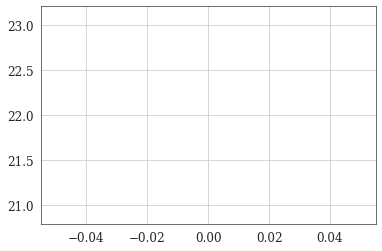

In [2]:
work_dir = Path('..\..\data\SST')
file_name = 'delta.npy'
data = np.load(work_dir / file_name)
plt.plot(data)

In [3]:
work_dir = Path('..\..\data\SST')
file_name = Path('Sep2019') / 'resulring_cube_Sep2019.npz'
data = np.load(work_dir / file_name)
data_s = data['arr_0'].transpose((1, 2, 0))

In [4]:
data_s.shape

(45, 117, 720)

In [19]:
np.sum(data_s == data_s[30, 100, 1])

70

In [18]:
data_s[30, 100, 1]

299.25732

In [21]:
file_name = 'corr_online_All2019_6h_resolution_0.75_window_15d_delay_7d.npy'
data = np.load(work_dir / file_name, mmap_mode = 'r')

In [22]:
data.shape

(187, 187, 1460)

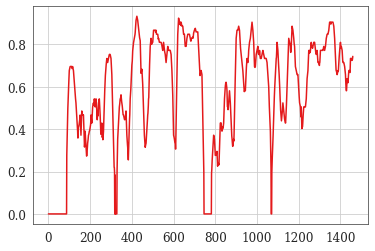

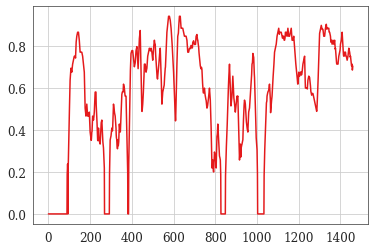

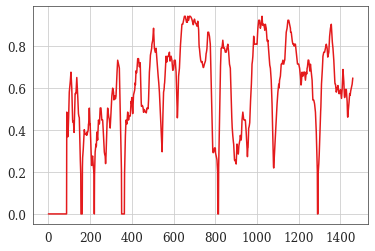

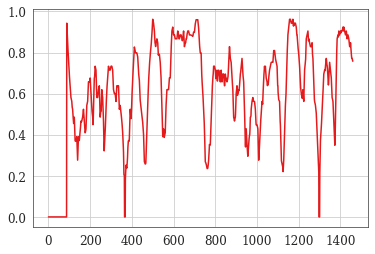

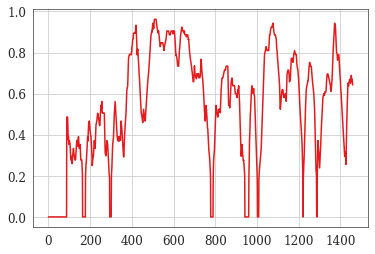

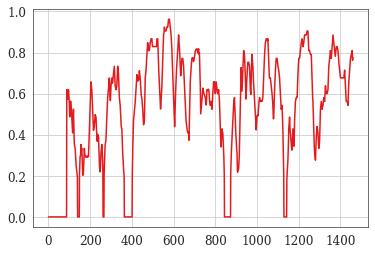

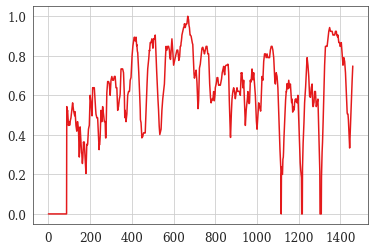

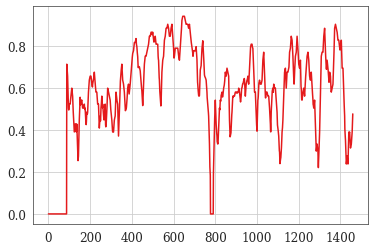

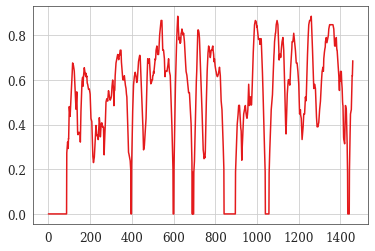

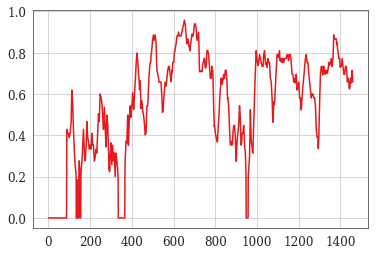

In [23]:
for i in range(10):
    id1 = np.random.randint(data.shape[0])
    id2 = np.random.randint(data.shape[0])
    plt.figure()
    t = np.linspace()
    plt.plot(data[id1, id2, :])

In [8]:

n = 10
m = 10
nt = 100
data_s = np.random.rand(n, m, nt)

In [4]:
W = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(W.shape)
print(W)
W = W.reshape(-1, 1)
print(W.shape)
print(W)

(3, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(12, 1)
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]


In [9]:
data = data_s.reshape(-1, data_s.shape[2])
data = data[~np.any(np.isnan(data), axis = 1), :]
data.shape

(100, 100)

In [10]:
from corr_network import compute_tau_kendall_overall
from time import time
be = time()
tau_corr = compute_tau_kendall_overall(data)
en = time()
print(en - be)

75.31792569160461


In [6]:
compute_tau_kendall_overall.parallel_diagnostics()

 
 Parallel Accelerator Optimizing:  Function compute_tau_kendall_overall, 
D:\PC\UNN\Science\Climate\programs\corr_network\corr_network.py (397)  


Parallel loop listing for  Function compute_tau_kendall_overall, D:\PC\UNN\Science\Climate\programs\corr_network\corr_network.py (397) 
-------------------------------------------------------------------------------------------------------------|loop #ID
@jit(nopython = numba_nopython, nogil = numba_nogil, cache = numba_cache, parallel = numba_parallel)         | 
def compute_tau_kendall_overall(data, window_size = 15, delay_time = 7, alpha = 0.05):                       | 
    nm, nt = data.shape                                                                                      | 
    tau_corr = np.zeros((nm, nm, nt), dtype = np.float32)----------------------------------------------------| #1
    for i in prange(nm):-------------------------------------------------------------------------------------| #3
        tau_tmp = np.zeros((nm,

In [10]:
import corr_network_scipy
tau_corr2 = corr_network_scipy.compute_tau_kendall_overall(data)

In [12]:
import numba as nb
nb.config.NUMBA_NUM_THREADS

6

In [13]:
ok = np.all((tau_corr - tau_corr2) == 0)
print(ok)
assert(ok)

True


(array([   0.,    0.,    0.,    0.,    0., 1600.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <a list of 10 Patch objects>)

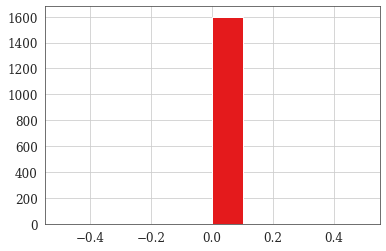

In [11]:
plt.hist((tau_corr - tau_corr2).flatten())

In [8]:
#err = tau_corr - tau_corr2
import corr_network
import corr_network_scipy
print(corr_network.kendalltau(data[1, :20], data[0, :20]))
print(corr_network_scipy.kendalltau(data[1, :20], data[0, :20]))


[1.00000000e+00 1.90000000e+01 1.89000000e+02 1.31000000e+03
 7.10500000e+03 3.21100000e+04 1.25761000e+05 4.38407000e+05
 1.38673500e+06 4.03809000e+06 1.09470790e+07 2.78763450e+07
 6.71635180e+07 1.54022930e+08 3.37879565e+08 7.12033264e+08
 1.44667756e+09 2.84270795e+09 5.41702861e+09 1.00343984e+10
 1.81064473e+10 3.18855343e+10 5.48897737e+10 9.25059459e+10
 1.52829186e+11 2.47812240e+11 3.94812550e+11 6.18642070e+11
 9.54242121e+11 1.45012290e+12 2.17272368e+12 3.21186393e+12
 4.68746644e+12 6.75773910e+12 9.62900111e+12 1.35673295e+13
 1.89121819e+13 2.60921200e+13 3.56427104e+13 4.82266223e+13
 6.46558609e+13 8.59159875e+13 1.13192067e+14 1.47895961e+14
 1.91694460e+14 2.46537590e+14 3.14686300e+14 3.98738581e+14
 5.01652931e+14 6.26767957e+14 7.77816794e+14 9.58934956e+14
 1.17466018e+15 1.42992285e+15 1.73002557e+15 2.08061077e+15
 2.48761496e+15 2.95720914e+15 3.49572445e+15 4.10956299e+15
 4.80509403e+15 5.58853612e+15 6.46582623e+15 7.44247771e+15
 8.52342896e+15 9.712885

In [43]:
import math
corr_network.factorial(18) - math.factorial(18)

-1.0

In [ ]:
tau_corr = compute_tau_kendall_overall(data)

In [1]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"

In [7]:
type(np.float64(-1.))

numpy.float64

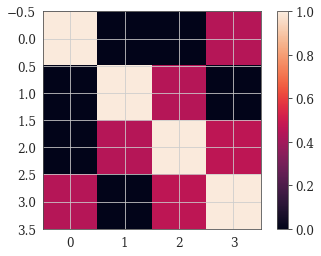

In [4]:
plt.imshow(tau_corr[:, :, 30])
plt.colorbar()